In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys

sns.set_style('darkgrid')
sns.set_palette('bone')

#pd.options.display.float_format = '{:.5g}'.format
pd.options.display.float_format = '{:,.2f}'.format

print(os.listdir("../Pubg-predict/input"))

['test_V2.csv', 'train_V2.csv']


In [58]:
def toTapleList(list1,list2):
    return list(itertools.product(list1,list2))

In [59]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# Load data

In [60]:
%%time
train = pd.read_csv('../Pubg-predict/input/train_V2.csv')
train = reduce_mem_usage(train)
test = pd.read_csv('../Pubg-predict/input/test_V2.csv')
test = reduce_mem_usage(test)
print(train.shape, test.shape)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)
Memory usage of dataframe is 413.18 MB --> 140.19 MB (Decreased by 66.1%)
(4446966, 29) (1934174, 28)
Wall time: 24.2 s


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float32
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float32
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float32
roadKills          int8
swimDistance       float32
teamKills          int8
vehicleDestroys    int8
walkDistance       float32
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float32
dtypes: float32(6), int16(5), int8(14), object(4)
memory usage: 339.3+ MB


In [62]:
null_cnt = train.isnull().sum().sort_values()
print(null_cnt[null_cnt > 0])
# dropna
train.dropna(inplace=True)

winPlacePerc    1
dtype: int64


In [63]:
train.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.23,0.59,0.00,0.00,0.00,0.00,22.00
boosts,1.11,1.72,0.00,0.00,0.00,2.00,33.00
damageDealt,130.63,169.89,0.00,0.00,84.24,186.00,"6,616.00"
DBNOs,0.66,1.15,0.00,0.00,0.00,1.00,53.00
headshotKills,0.23,0.60,0.00,0.00,0.00,0.00,64.00
heals,1.37,2.68,0.00,0.00,0.00,2.00,80.00
killPlace,47.60,27.46,1.00,24.00,47.00,71.00,101.00
killPoints,505.01,627.50,0.00,0.00,0.00,"1,172.00","2,170.00"
kills,0.92,1.56,0.00,0.00,0.00,1.00,72.00
killStreaks,0.54,0.71,0.00,0.00,0.00,1.00,20.00


# Data Analysis

## Id, groupId, matchId

In [64]:
for c in ['Id','groupId','matchId']:
    print(f'unique [{c}] count:', train[c].nunique())

unique [Id] count: 4446965
unique [groupId] count: 2026744
unique [matchId] count: 47964


## matchType

There are 3 game modes in the game.  One can play solo, or with a friend (duo), or with 3 other friends (squad).

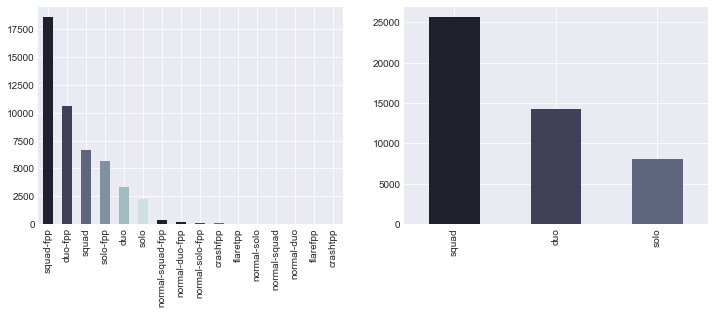

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

'''
solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp
'''
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

## maxPlace, numGroups

In [66]:
for q in ['numGroups == maxPlace','numGroups != maxPlace']:
    print(q, ':', len(train.query(q)))

numGroups == maxPlace : 1241089
numGroups != maxPlace : 3205876


In [67]:
# describe
cols = ['numGroups','maxPlace']
desc1 = train.groupby('matchType')[cols].describe()[toTapleList(cols,['min','mean','max'])]
# groups in match
group = train.groupby(['matchType','matchId','groupId']).count().groupby(['matchType','matchId']).size().to_frame('groups in match')
desc2 = group.groupby('matchType').describe()[toTapleList(['groups in match'],['min','mean','max'])]

pd.concat([desc1, desc2], axis=1)

numGroups              maxPlace              groups in match        \
                min  mean    max      min  mean    max             min  mean   
matchType                                                                      
duo            1.00 45.81  52.00     3.00 47.61  52.00            1.00 45.35   
solo           1.00 91.12 100.00     2.00 93.91 100.00            1.00 85.68   
squad          2.00 27.04  37.00     2.00 27.98  37.00            2.00 26.83   

                  
             max  
matchType         
duo        52.00  
solo      100.00  
squad      37.00

In [68]:
# players in match, group
# 100 players join the same server,
# so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.
match = train.groupby(['matchType','matchId']).size().to_frame('players in match')
group = train.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[toTapleList(['players in match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[toTapleList(['players in group'],['min','mean','max'])]], axis=1)

players in match              players in group           
                       min  mean    max              min mean   max
matchType                                                          
duo                   7.00 92.99 100.00             1.00 2.05 72.00
solo                  2.00 89.04 100.00             1.00 1.04 64.00
squad                 5.00 93.72 100.00             1.00 3.49 74.00

- Too many group players

In [69]:
print(group['players in group'].nlargest(5))
del match,group

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    74
duo        3e029737889ce9  b8275198faa03b    72
solo       41a634f62f86b7  128b07271aa012    64
duo        7e93ce71ac6f61  7385e5fe214021    49
squad      3c2531adf5b942  e52a2e6ca30474    36
Name: players in group, dtype: int64


In [70]:
''' ex) matchId=='41a634f62f86b7', groupId=='128b07271aa012'
'''
subset = train[train['matchId']=='41a634f62f86b7']
sub_grp = subset[subset['groupId']=='128b07271aa012']

print('matchId==\'41a634f62f86b7\' & groupId==\'128b07271aa012\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('numGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())

matchId=='41a634f62f86b7' & groupId=='128b07271aa012'
--------------------------------------------------
players: 97
groups: 34
numGroups: [34]
maxPlace: [97]
--------------------------------------------------
max-group players: 64
max-group winPlacePerc: [0.28119999]
--------------------------------------------------
winPlacePerc: [0.         0.0104     0.0208     0.0312     0.0417     0.0521
 0.0625     0.0729     0.0833     0.0938     0.1042     0.1146
 0.125      0.1354     0.14579999 0.15620001 0.16670001 0.1771
 0.1875     0.1979     0.20829999 0.21879999 0.22920001 0.2396
 0.25       0.2604     0.27079999 0.28119999 0.7604     0.77079999
 0.89579999 0.91670001 0.9896     1.        ]


## matchDuration

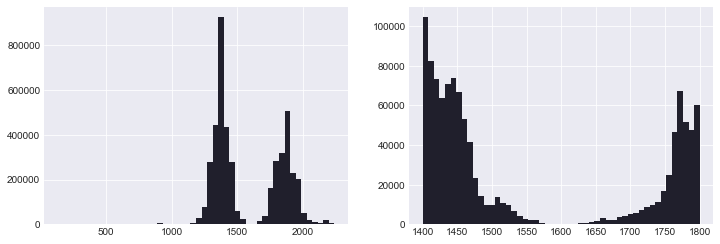

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# there are two types of maps?
train['matchDuration'].hist(bins=50, ax=ax[0])
train.query('matchDuration >= 1400 & matchDuration <= 1800')['matchDuration'].hist(bins=50, ax=ax[1])

In [72]:
train[train['matchDuration'] == train['matchDuration'].min()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1206365,28f2bb56074e95,311a5a9adf1a96,e5a77433bc436f,0,0,100.00,0,1,0,1,...,0,0.00,0,0.00,0,0,0.28,2,0,1.00
2109739,2a5f4f18fe9e86,f290930a32548a,e5a77433bc436f,0,0,0.00,0,0,0,2,...,0,0.00,0,0.00,0,0,0.00,2,0,0.00


In [73]:
train[train['matchDuration'] == train['matchDuration'].max()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
130663,8089c9ef1fa09e,3c909156e89431,f8e02cb4c82d7d,0,0,0.00,0,0,0,72,...,0,0.00,0,0.00,0,0,231.80,3,0,0.26
139317,3049d51e07bab3,4086a790e99513,f8e02cb4c82d7d,0,0,100.00,0,0,0,34,...,0,0.00,0,0.00,0,0,696.00,7,0,0.46
146220,cb3902c30f688c,65400d5cf84ead,f8e02cb4c82d7d,0,0,0.00,0,0,0,85,...,0,0.00,0,0.00,0,0,99.95,1,0,0.12
246201,80e022ce3a64ff,b668e37229bb2d,f8e02cb4c82d7d,0,1,96.25,0,1,0,35,...,0,0.00,0,0.00,0,0,"1,395.00",6,0,0.38
268239,0e50a3a859d3ab,9dcca2c1beb072,f8e02cb4c82d7d,0,0,0.00,0,0,0,41,...,0,0.00,0,0.00,0,0,121.70,3,0,0.91


In [74]:
# same match is same duration
(train.groupby('matchId')['matchDuration'].nunique() > 1).any()

False

## boosts, heals

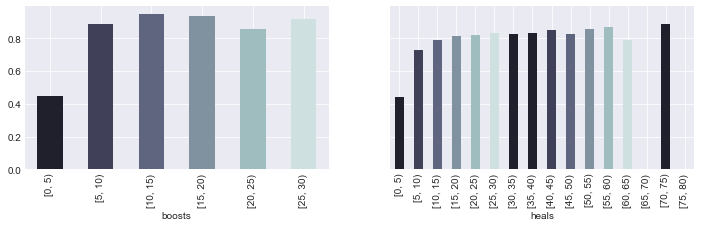

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

cols = ['boosts','heals']
for col, ax in zip(cols, ax.ravel()):
    sub = train[['winPlacePerc',col]].copy()
    mv = (sub[col].max() // 5) + 1
    sub[col] = pd.cut(sub[col], [5*x for x in range(0,mv)], right=False)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax)

## revives

In [76]:
# solo players are not revives
'solo' in train.query('revives > 0')['matchType'].unique()

False

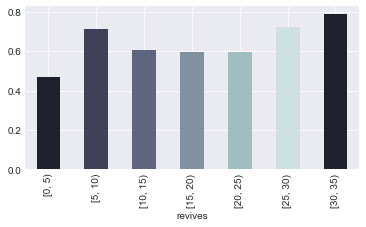

In [77]:
plt.figure(figsize=(6,3))
col = 'revives'
sub = train.loc[~train['matchType'].str.contains('solo'),['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,8)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar()

## killPlace

In [78]:
train.groupby(['matchType'])['killPlace'].describe()[['min','mean','max']]

,min,mean,max
matchType,,,
duo,1.00,47.47,100.00
solo,1.00,47.46,100.00
squad,1.00,47.71,101.00


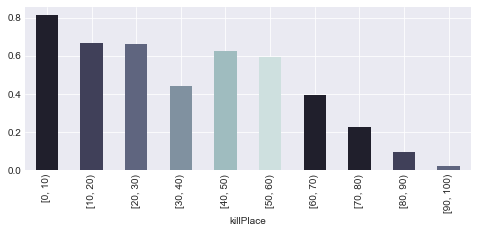

In [79]:
plt.figure(figsize=(8,3))
col = 'killPlace'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [10*x for x in range(0,11)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar()

In [80]:
''' important 
killPlace is a sorted ranking of kills and winPlacePerc in each match.
'''
sub = train[train['matchId'] == train['matchId'].min()].sort_values(['winPlacePerc','killPlace'])
cols = ['groupId','kills','winPlacePerc','killPlace']
sub[cols]

,groupId,kills,winPlacePerc,killPlace
3895898,3a6addfa0df938,0,0.00,94
3599150,3a6addfa0df938,0,0.00,95
4367296,236ab9e9c081b9,0,0.04,88
4131025,236ab9e9c081b9,0,0.04,89
3088817,236ab9e9c081b9,0,0.04,90
2290792,236ab9e9c081b9,0,0.04,91
1998699,236ab9e9c081b9,0,0.04,92
1425950,236ab9e9c081b9,0,0.04,93
329124,e8ff1c0fe7f6aa,0,0.07,84
729840,e8ff1c0fe7f6aa,0,0.07,85


## kills

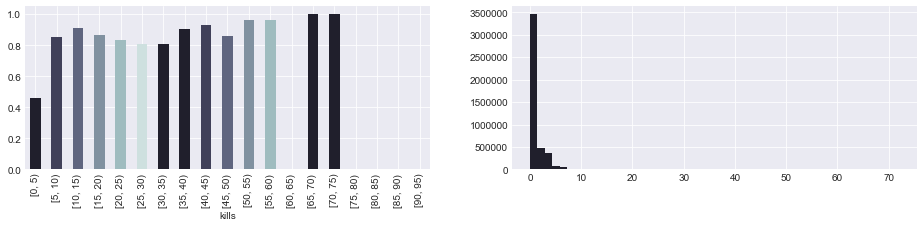

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(16, 3))

col = 'kills'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,20)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=50, ax=ax[1])

In [82]:
# kills summary of match
sub = train['matchType'].str.contains('solo')
pd.concat([train.loc[sub].groupby('matchId')['kills'].sum().describe(),
         train.loc[~sub].groupby('matchId')['kills'].sum().describe()], keys=['solo','team'], axis=1).T

,count,mean,std,min,25%,50%,75%,max
solo,"8,094.00",83.42,27.59,0.00,84.00,89.00,92.00,786.00
team,"39,870.00",86.21,17.27,0.00,83.00,87.00,90.00,687.00


## killStreaks, DBNOs

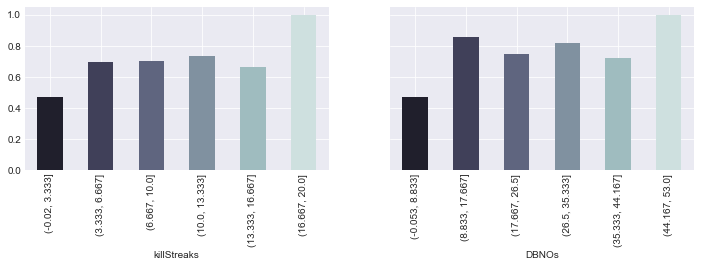

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

cols = ['killStreaks','DBNOs']
for col, ax in zip(cols, ax.ravel()):
    sub = train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax)

## headshotKills, roadKills, teamKills

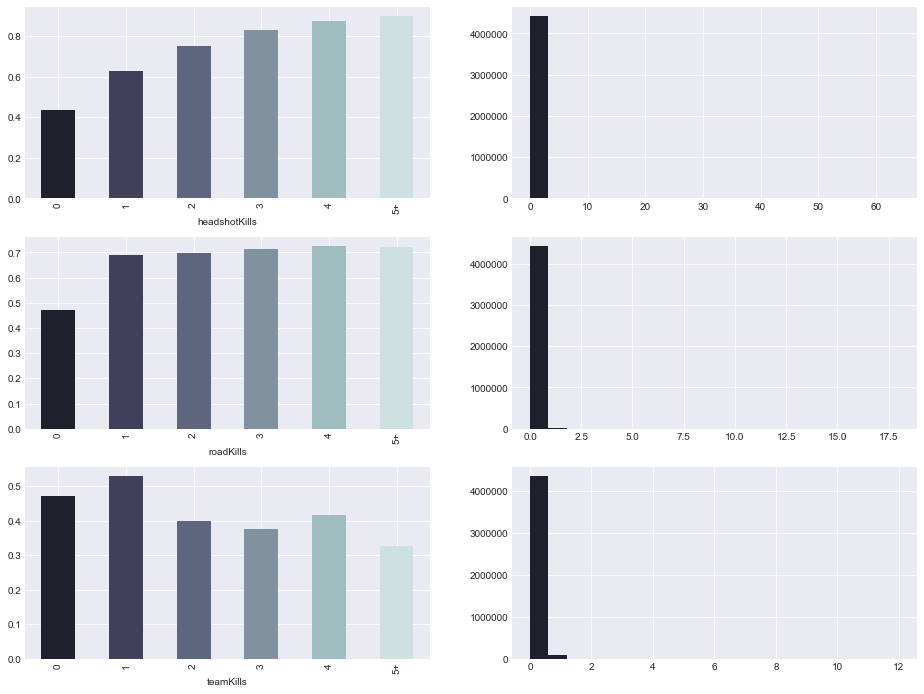

In [84]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

cols = ['headshotKills','roadKills','teamKills']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    sub.loc[sub[col] >= 5, col] = '5+'  
    sub[col] = sub[col].astype(str)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

## longestKill

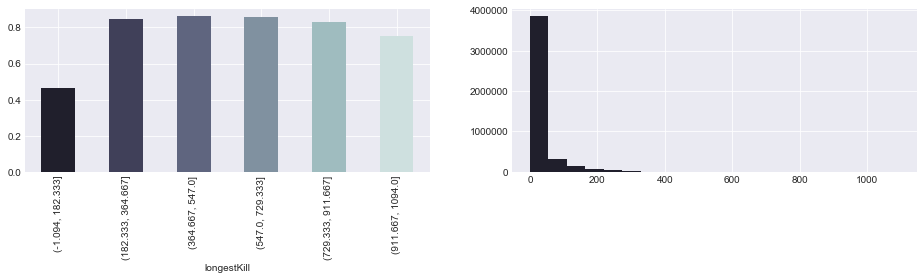

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(16, 3))

col = 'longestKill'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], 6)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

## damageDealt

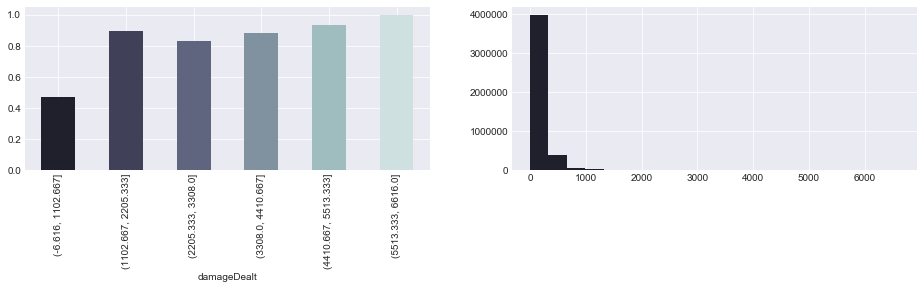

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(16, 3))

col = 'damageDealt'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], 6)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

In [87]:
train.query('damageDealt == 0 & kills > 0')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
892,1483b507bf43be,e468ae00a05134,19b3a8232074e5,1,0,0.00,0,0,1,37,...,0,0.00,0,0.00,0,0,231.10,2,1443,0.30
942,0da074947acace,780051d11688f1,56b36999cfe3ee,0,0,0.00,0,0,0,39,...,0,0.00,0,0.00,0,0,62.34,2,1474,0.19
2448,c63b184658a1a3,3dc6e06ab727eb,e26d9b4f6dfdf1,0,0,0.00,0,0,0,26,...,0,0.00,0,0.00,1,0,"1,514.00",3,0,0.55
2850,751d4916e02c7c,f1d428a4b98ba1,5ae3a69bef506e,0,0,0.00,0,1,0,28,...,1,"2,214.00",0,0.00,0,0,914.80,5,0,0.58
3011,b155164fd1f063,e29566c9a0d7b4,abad739a729c29,0,3,0.00,0,0,2,37,...,0,0.00,0,0.00,0,0,"2,087.00",8,1492,0.46
4747,25fb111beaf816,bdc2e0705640fb,219ed623862ed4,0,0,0.00,0,0,0,30,...,0,0.00,0,0.00,0,0,"1,723.00",7,1508,0.46
4959,c1a57468b1d2e1,b1fa42ecd85a15,e75bced9eb639f,0,0,0.00,0,0,0,43,...,0,0.00,0,0.00,0,0,53.65,2,1534,0.08
7358,3f0eab906b6e9f,07374159021e35,ef1b41a9c78e1a,0,1,0.00,0,0,0,22,...,0,176.10,0,0.00,0,0,"3,064.00",6,1512,0.80
7618,0186aafa952745,4f629206c7667a,90ad519f24761f,0,0,0.00,0,0,0,43,...,0,0.00,0,0.00,0,0,132.00,2,1489,0.03
8079,295e7eca024ac8,7693e8f7a3625b,95b5e94f30501a,0,4,0.00,0,1,5,19,...,1,"1,339.00",0,0.00,0,0,"2,339.00",8,0,0.84


## walkDistance, rideDistance, swimDistance

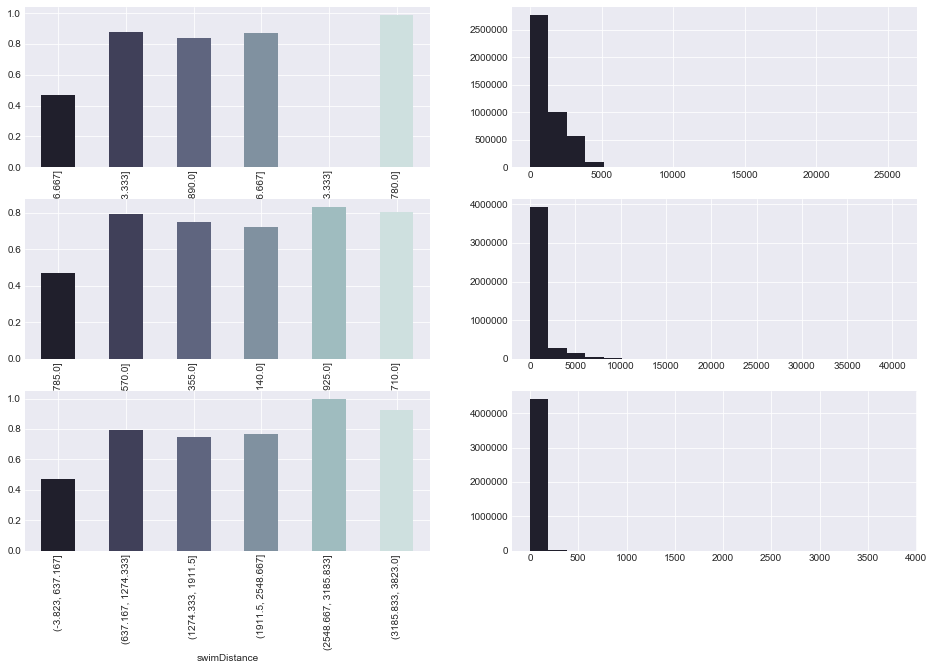

In [88]:
fig, ax = plt.subplots(3, 2, figsize=(16, 10))

cols = ['walkDistance', 'rideDistance', 'swimDistance']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

In [89]:
# cheater?
sq = ''
querys = ['walkDistance == 0 & rideDistance == 0 & swimDistance == 0',' & kills > 0',' & headshotKills > 0',' & heals > 0']
for q in querys:
    sq += q
    sub = train.query(sq)
    print(sq, '\n count:', len(sub), ' winPlacePerc:', sub['winPlacePerc'].mean())
del sub

walkDistance == 0 & rideDistance == 0 & swimDistance == 0 
 count: 97369  winPlacePerc: 0.04042094200849533
walkDistance == 0 & rideDistance == 0 & swimDistance == 0 & kills > 0 
 count: 1535  winPlacePerc: 0.4728987514972687
walkDistance == 0 & rideDistance == 0 & swimDistance == 0 & kills > 0 & headshotKills > 0 
 count: 876  winPlacePerc: 0.54758220911026
walkDistance == 0 & rideDistance == 0 & swimDistance == 0 & kills > 0 & headshotKills > 0 & heals > 0 
 count: 467  winPlacePerc: 0.5877774953842163


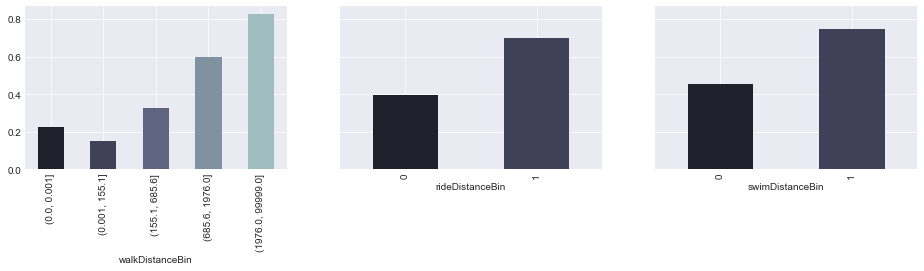

In [90]:
sub = train[['walkDistance','rideDistance','swimDistance','winPlacePerc']].copy()
walk = train['walkDistance']
sub['walkDistanceBin'] = pd.cut(walk, [0, 0.001, walk.quantile(.25), walk.quantile(.5), walk.quantile(.75), 99999])
sub['rideDistanceBin'] = (train['rideDistance'] > 0).astype(int)
sub['swimDistanceBin'] = (train['swimDistance'] > 0).astype(int)

fig, ax = plt.subplots(1, 3, figsize=(16, 3), sharey=True)
sub.groupby('walkDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[0])
sub.groupby('rideDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[1])
sub.groupby('swimDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[2])
del sub, walk

## killPoints, rankPoints, winPoints

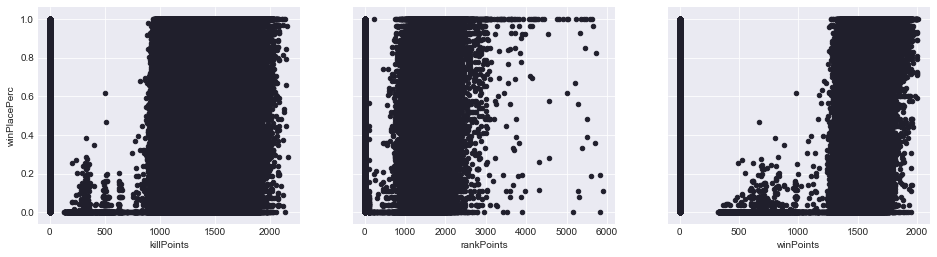

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

cols = ['killPoints','rankPoints','winPoints']
for col, ax in zip(cols, ax.ravel()): 
    train.plot.scatter(x=col, y='winPlacePerc', ax=ax)

In [92]:
# rankPoint: being deprecated
# killPoints,winPoints: If there is a value other than -1 in rankPoints, then any 0 should be treated as a “None”.
sign = lambda x: 'p<=0' if x <= 0 else 'p>0'
pd.concat([
    pd.crosstab(train['rankPoints'].apply(sign), train['winPoints'].apply(sign), margins=False),
    pd.crosstab(train['rankPoints'].apply(sign), train['killPoints'].apply(sign), margins=False)
], keys=['winPoints','killPoints'], axis=1)

winPoints          killPoints         
winPoints       p<=0      p>0       p<=0      p>0
rankPoints                                       
p<=0               0  1791319          0  1791319
p>0          2655646        0    2655646        0

## winPlacePerc

In [93]:
#sns.distplot(train['killPoints'], kde=False)

In [94]:
train['winPlacePerc'].describe()

count   4,446,965.00
mean            0.47
std             0.31
min             0.00
25%             0.20
50%             0.46
75%             0.74
max             1.00
Name: winPlacePerc, dtype: float64

In [95]:
# confirm unique winPlace in group
#nuniquePlace = train.groupby(['matchId','groupId'])['winPlacePerc'].nunique()
#print('not unique winPlace in group:', len(nuniquePlace[nuniquePlace > 1]))
#del nuniquePlace

In [96]:
print('match count:', train['matchId'].nunique())

# not contains 1st place
maxPlacePerc = train.groupby('matchId')['winPlacePerc'].max()
print('match [not contains 1st place]:', len(maxPlacePerc[maxPlacePerc != 1]))
del maxPlacePerc

# edge case
sub = train[(train['maxPlace'] > 1) & (train['numGroups'] == 1)]
print('match [maxPlace>1 & numGroups==1]:', len(sub.groupby('matchId')))
print(' - unique winPlacePerc:', sub['winPlacePerc'].unique())

match count: 47964
match [not contains 1st place]: 74
match [maxPlace>1 & numGroups==1]: 68
 - unique winPlacePerc: [0.]


In [97]:
pd.concat([train[train['winPlacePerc'] == 1].head(5),
           train[train['winPlacePerc'] == 0].head(5)],
          keys=['winPlacePerc_1', 'winPlacePerc_0'])

Id         groupId         matchId  assists  \
winPlacePerc_1 67   22252be49d4419  37fa7583da2fa2  1ce1cb998f75c7        1   
               107  7970b4ea89e81e  abf9e2780b9f48  04832cfd74ff30        1   
               118  953577684b828a  54ce33c41ef9ff  c5d412db6dbee4        2   
               123  174c758156bcf3  a935604c9bb7aa  edc87c8d445823        1   
               186  eb7a3e9f50eca5  fe3d74f737cd10  92338c2233be1a        0   
winPlacePerc_0 6    95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2        0   
               29   ac5b57ff39979c  857cc55b2b6001  e019e04dee4f19        0   
               62   eea397f23204bd  19650a810dbdbf  b99cd2f850c233        0   
               74   8b3cdbefd1f408  d25fc68b94f38c  128c05e4e54c63        0   
               103  c4260ce3746cf8  2e3ce1fb9b7812  8fb790bb47a1cc        0   

                    boosts  damageDealt  DBNOs  headshotKills  heals  \
winPlacePerc_1 67        5       378.80      2              3      6   
               107       1        58.36      0              0      2   
               118       6        76.11      0              0     12   
               123       9       626.20      4              3      2   
               186       5       778.00      0              3      2   
winPlacePerc_0 6         0         0.00      0              0      0   
               29        0         0.00      0              0      0   
               62        0       100.00      1              0      0   
               74        0         0.00      0              0      0   
               103       0         0.00      0              0      0   

                    killPlace      ...       revives  rideDistance  roadKills  \
winPlacePerc_1 67           4      ...             0        317.70          0   
               107         38      ...             0      5,134.00          0   
               118         45      ...             1          0.00          0   
               123          4      ...             0      1,045.00          0   
               186          2      ...             0          0.00          0   
winPlacePerc_0 6           96      ...             0          0.00          0   
               29          87      ...             0          0.00          0   
               62          41      ...             0          0.00          0   
               74          91      ...             0          0.00          0   
               103         94      ...             0          0.00          0   

                    swimDistance  teamKills vehicleDestroys  walkDistance  \
winPlacePerc_1 67           0.00          0               1      3,120.00   
               107          0.00          0               0      2,708.00   
               118          0.00          0               0      2,635.00   
               123          0.00          0               0      2,814.00   
               186          0.00          0               0      2,422.00   
winPlacePerc_0 6            0.00          0               0         13.50   
               29           0.00          0               0          0.00   
               62           0.00          0               0          9.91   
               74           0.00          0               0         27.06   
               103          0.00          0               0         68.90   

                    weaponsAcquired  winPoints  winPlacePerc  
winPlacePerc_1 67                 4          0          1.00  
               107                7          0          1.00  
               118                7          0          1.00  
               123                7       1566          1.00  
               186                5       1506          1.00  
winPlacePerc_0 6                  1       1497          0.00  
               29                 0          0          0.00  
               62                 1       1514          0.00  
               74                 1          0          0.00  

## match summary

In [98]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt',
    'walkDistance','rideDistance','swimDistance','weaponsAcquired']

aggs = ['count','min','mean','max']
# summary of solo-match
grp = train.loc[train['matchType'].str.contains('solo')].groupby('matchId')
grpSolo = grp[cols].sum()
# summary of team-match
grp = train.loc[~train['matchType'].str.contains('solo')].groupby('matchId')
grpTeam = grp[cols].sum()

pd.concat([grpSolo.describe().T[aggs], grpTeam.describe().T[aggs]], keys=['solo', 'team'], axis=1)

solo                                  team       \
                   count    min      mean        max     count  min   
kills           8,094.00   0.00     83.42     786.00 39,870.00 0.00   
teamKills       8,094.00   0.00      1.02      15.00 39,870.00 0.00   
DBNOs           8,094.00   0.00      0.00       0.00 39,870.00 0.00   
revives         8,094.00   0.00      0.00       0.00 39,870.00 0.00   
assists         8,094.00   0.00      5.54     219.00 39,870.00 0.00   
boosts          8,094.00   0.00     94.37     182.00 39,870.00 0.00   
heals           8,094.00   0.00     90.30     395.00 39,870.00 0.00   
damageDealt     8,094.00 100.00 10,610.86  80,991.20 39,870.00 0.00   
walkDistance    8,094.00   0.00 85,067.09 156,265.72 39,870.00 0.00   
rideDistance    8,094.00   0.00 41,250.51 207,528.62 39,870.00 0.00   
swimDistance    8,094.00   0.00    452.99   5,222.35 39,870.00 0.00   
weaponsAcquired 8,094.00   4.00    320.02   1,860.00 39,870.00 0.00   

                                       
                      mean        max  
kills                86.21     687.00  
teamKills             2.45      76.00  
DBNOs                73.38     669.00  
revives              18.37      81.00  
assists              24.95     275.00  
boosts              104.30     227.00  
heals               134.49     424.00  
damageDealt      12,425.67  68,960.34  
walkDistance    111,468.27 216,150.88  
rideDistance     59,229.43 370,542.19  
swimDistance        410.99   9,829.96  
weaponsAcquired     343.31   1,666.00

In [99]:
grpSolo.nlargest(10, 'kills')

,kills,teamKills,DBNOs,revives,assists,boosts,heals,damageDealt,walkDistance,rideDistance,swimDistance,weaponsAcquired
matchId,,,,,,,,,,,,
cfa2775c9ef944,786.00,1.00,0.00,0.00,185.00,0.00,395.00,"80,991.20","15,327.69","17,631.70",0.00,1860
fe7043ee6221c8,691.00,2.00,0.00,0.00,219.00,18.00,53.00,"67,722.70","19,284.92","8,599.50",0.00,1497
e024bf51bf1799,516.00,3.00,0.00,0.00,159.00,0.00,60.00,"52,742.70","14,045.65","7,914.80",0.00,1109
f900de1ec39fa5,415.00,1.00,0.00,0.00,151.00,0.00,42.00,"40,134.00","8,468.61","8,739.50",0.00,877
5921b55b9e96b5,387.00,0.00,0.00,0.00,110.00,0.00,56.00,"40,473.00","11,463.26","4,915.00",0.00,837
3ebf1bf8bc6bae,360.00,0.00,0.00,0.00,83.00,45.00,96.00,"36,416.70","18,180.00","15,369.64",0.00,808
54277ef2ed69b7,337.00,0.00,0.00,0.00,75.00,0.00,147.00,"34,283.70","30,549.42","23,300.10",1.84,817
e886a8ebb702cf,336.00,1.00,0.00,0.00,58.00,4.00,94.00,"37,938.50","20,982.22","9,621.00",0.00,857
2a7474cd8c7625,332.00,2.00,0.00,0.00,96.00,4.00,122.00,"33,557.30","14,989.19","5,034.23",0.00,791


In [100]:
grpTeam.nlargest(10, 'kills')

,kills,teamKills,DBNOs,revives,assists,boosts,heals,damageDealt,walkDistance,rideDistance,swimDistance,weaponsAcquired
matchId,,,,,,,,,,,,
6680c7c3d17d48,687.00,7.00,0.00,0.00,232.00,60.00,134.00,"65,617.10","11,311.93","8,454.95",0.00,1558
8a728def0644be,656.00,1.00,669.00,35.00,258.00,0.00,277.00,"68,960.34","27,110.52","17,190.26",0.00,1558
6bf647ecee30da,638.00,12.00,0.00,0.00,157.00,1.00,236.00,"64,173.06","67,684.25","33,173.24",0.00,1666
25830709cb9033,628.00,3.00,0.00,0.00,181.00,0.00,296.00,"65,856.80","49,591.73","32,569.00",0.00,1553
17dea22cefe62a,583.00,3.00,0.00,0.00,181.00,4.00,102.00,"61,720.80","15,640.52","20,187.86",0.00,1348
313c9787226bbe,574.00,2.00,610.00,44.00,198.00,4.00,303.00,"62,903.28","54,510.93","21,588.58","1,908.82",1477
4881dc60a3e594,558.00,8.00,632.00,66.00,275.00,1.00,148.00,"66,578.05","49,599.78","30,638.00",0.00,1418
1e573980b3ee3c,511.00,7.00,0.00,0.00,150.00,0.00,236.00,"53,004.80","18,996.35","13,574.30",0.00,1225
dbf34301df5e53,502.00,6.00,0.00,0.00,149.00,0.00,99.00,"55,145.42","55,114.84","44,973.00","1,806.10",1291


In [101]:
del grpSolo, grpTeam

## group summary

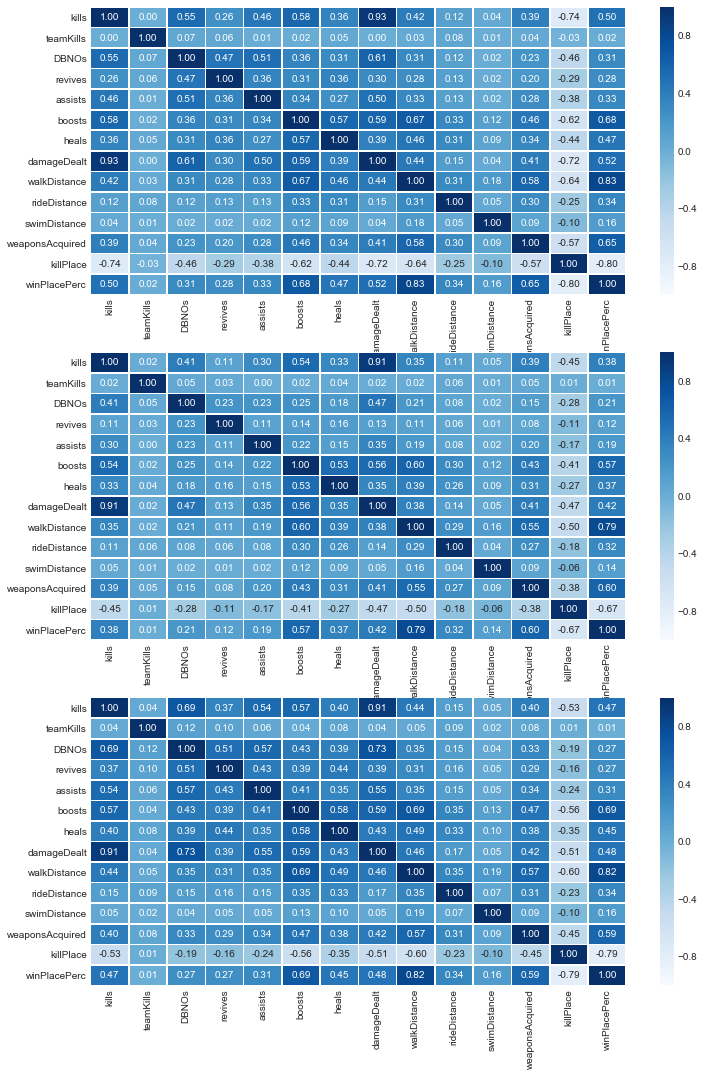

In [102]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt',
    'walkDistance','rideDistance','swimDistance','weaponsAcquired']
cols.extend(['killPlace','winPlacePerc'])
group = train.groupby(['matchId','groupId'])[cols]

fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharey=True)
for df, ax in zip([group.mean(), group.min(), group.max()], ax.ravel()):
    sns.heatmap(df.corr(), annot=True, linewidths=.6, fmt='.2f', vmax=1, vmin=-1, center=0, cmap='Blues', ax=ax)

del df

In [103]:
print(pd.DataFrame([[val for val in dir()], [sys.getsizeof(eval(val)) for val in dir()]],
                   index=['name','size']).T.sort_values('size', ascending=False).reset_index(drop=True)[:10])

         name        size
0       train  1515211115
1        test   621315452
2     X_train   579648888
3      X_test   253464458
4  X_test_grp   125846042
5     Y_train     8107080
6         _87     1417483
7         _15     1384740
8         sub      389643
9      subset       33004


# Feature Engineering

In [104]:
all_data = train.append(test, sort=False).reset_index(drop=True)
del train, test
gc.collect()

7568

## rank as percent

In [105]:
match = all_data.groupby('matchId')
all_data['killPlacePerc'] = match['kills'].rank(pct=True).values
all_data['walkDistancePerc'] = match['walkDistance'].rank(pct=True).values
#all_data['damageDealtPerc'] = match['damageDealt'].rank(pct=True).values

## distance

In [106]:
all_data['_totalDistance'] = all_data['rideDistance'] + all_data['walkDistance'] + all_data['swimDistance']

## zombi, cheater

In [107]:
_='''
all_data['zombi'] = ((all_data['_totalDistance'] == 0) & (all_data['kills'] == 0)
                     & (all_data['weaponsAcquired'] == 0) 
                     & (all_data['matchType'].str.contains('solo'))).astype(int)
all_data['cheater'] = ((all_data['kills'] / all_data['_totalDistance'] >= 1)
                       | (all_data['kills'] > 30) | (all_data['roadKills'] > 10)).astype(int)
pd.concat([all_data['zombi'].value_counts(), all_data['cheater'].value_counts()], axis=1).T
'''

## reset point

In [108]:
#all_data.loc[all_data['rankPoints'] <= 0, 'rankPoints'] = all_data.loc[all_data['rankPoints'] <= 0, 'killPoints']
#all_data.loc[all_data['killPoints'] == 0, 'killPoints'] = all_data.loc[all_data['killPoints'] == 0, 'rankPoints']
#all_data.loc[all_data['winPoints'] == 0, 'winPoints'] = all_data.loc[all_data['winPoints'] == 0, 'rankPoints']

## new feature

In [109]:
def fillInf(df, val):
    numcols = df.select_dtypes(include='number').columns
    cols = numcols[numcols != 'winPlacePerc']
    df[df == np.Inf] = np.NaN
    df[df == np.NINF] = np.NaN
    for c in cols: df[c].fillna(val, inplace=True)

In [ ]:
#all_data["_specialKills"] = all_data["headshotKills"] + all_data["roadKills"]
#all_data['_partKills'] = all_data['kills'] + all_data['assists'] + all_data['DBNOs']
all_data['_healthItems'] = all_data['heals'] + all_data['boosts']
all_data['_killPlaceOverMaxPlace'] = all_data['killPlace'] / all_data['maxPlace']
all_data['_headshotKillRate'] = all_data['headshotKills'] / all_data['kills']
all_data['_killsOverWalkDistance'] = all_data['kills'] / all_data['walkDistance']
all_data['_killsOverDistance'] = all_data['kills'] / all_data['_totalDistance']
all_data['_walkDistanceMinute'] = all_data['walkDistance'] / all_data['matchDuration']

# suicide: solo and teamKills > 0
#all_data['_suicide'] = ((all_data['players'] == 1) & (all_data['teamKills'] > 0)).astype(int)

fillInf(all_data, 0)

## drop feature

In [ ]:
all_data.drop(['teamKills','roadKills','vehicleDestroys'], axis=1, inplace=True)
all_data.drop(['rideDistance','swimDistance','matchDuration'], axis=1, inplace=True)
all_data.drop(['rankPoints','killPoints','winPoints'], axis=1, inplace=True)

## grouping

* need to predict the order of places for groups within each match.
* train on group-level instead of the user-level

In [ ]:
match = all_data.groupby(['matchId'])
group = all_data.groupby(['matchId','groupId','matchType'])

# target feature (max, min)
agg_col = list(all_data.columns)
exclude_agg_col = ['Id','matchId','groupId','matchType','maxPlace','numGroups','winPlacePerc']
for c in exclude_agg_col:
    agg_col.remove(c)
print(agg_col)

# target feature (sum)
sum_col = ['kills','killPlace','damageDealt','revives','walkDistance','weaponsAcquired','_healthItems']

In [ ]:
''' match sum, group sum
'''
match_data = pd.concat([
    match.size().to_frame('m.players'), 
    match[sum_col].sum().rename(columns=lambda s: 'm.sum.' + s), 
    match[sum_col].max().rename(columns=lambda s: 'm.max.' + s)
    ], axis=1).reset_index()
match_data = pd.merge(match_data, 
    group[sum_col].sum().rename(columns=lambda s: 'sum.' + s).reset_index())
match_data = reduce_mem_usage(match_data)

print(match_data.shape)

In [ ]:
''' group mean, max, min
'''
all_data = pd.concat([
    group.size().to_frame('players'),
    group.mean(),
    group[agg_col].max().rename(columns=lambda s: 'max.' + s),
    group[agg_col].min().rename(columns=lambda s: 'min.' + s),
    ], axis=1).reset_index()
all_data = reduce_mem_usage(all_data)

print(all_data.shape)

## aggregate feature

In [ ]:
numcols = all_data.select_dtypes(include='number').columns.values
numcols = numcols[numcols != 'winPlacePerc']

In [ ]:
''' match rank
match = all_data.groupby('matchId')
matchRank = match[numcols].rank(pct=True).rename(columns=lambda s: 'rank.' + s)
all_data = pd.concat([all_data, matchRank], axis=1)

del matchRank
gc.collect()

print(all_data.shape)
'''

In [ ]:
''' match summary, max
'''
all_data = pd.merge(all_data, match_data)
del match_data
gc.collect()

for c in numcols:
    all_data['rank.' + c] = all_data[c] / all_data['m.max.' + c]

all_data['enemy.players'] = all_data['m.players'] - all_data['players']
all_data['m.sum._killDamage'] = all_data['m.sum.kills'] * 100 + all_data['m.sum.damageDealt']
for c in sum_col:
    all_data['enemy.' + c] = (all_data['m.sum.' + c] - all_data['sum.' + c]) / all_data['enemy.players']
    all_data['p.max_msum.' + c] = all_data['max.' + c] / all_data['m.sum.' + c]
    all_data['p.max_mmax.' + c] = all_data['max.' + c] / all_data['m.max.' + c]
    #all_data.drop(['sum.' + c, 'm.sum.' + c, 'm.max.' + c], axis=1, inplace=True)
    all_data.drop(['m.sum.' + c, 'm.max.' + c], axis=1, inplace=True)
    
fillInf(all_data, 0)
print(all_data.shape)

## killPlace rank of group and kills

In [ ]:
killMinorRank = all_data[['matchId','min.kills','max.killPlace']].copy()
group = killMinorRank.groupby(['matchId','min.kills'])
killMinorRank['rank.minor.maxKillPlace'] = group.rank(pct=True).values
all_data = pd.merge(all_data, killMinorRank)

killMinorRank = all_data[['matchId','max.kills','min.killPlace']].copy()
group = killMinorRank.groupby(['matchId','max.kills'])
killMinorRank['rank.minor.minKillPlace'] = group.rank(pct=True).values
all_data = pd.merge(all_data, killMinorRank)

del killMinorRank
gc.collect()

## match type

In [ ]:
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
#mapper = lambda x: 'solo' if ('solo' in x) else 'team'
all_data['matchTypeCat'] = all_data['matchType'].map(mapper)

print(all_data['matchTypeCat'].value_counts())

## delete feature

In [ ]:
# drop constant column
constant_column = [col for col in all_data.columns if all_data[col].nunique() == 1]
print('drop columns:', constant_column)
all_data.drop(constant_column, axis=1, inplace=True)

In [ ]:
_='''
all_data_T = all_data.T
print(all_data_T.duplicated().sum())

duplicated_features = all_data_T[all_data_T.duplicated()].index.values

print(len(all_data.columns))
all_data.drop(duplicated_features, axis=1, inplace=True)
'''

## encode

In [ ]:
null_cnt = all_data.isnull().sum().sort_values()
print(null_cnt[null_cnt > 0])

In [ ]:
#all_data.drop([],axis=1,inplace=True)

cols = [col for col in all_data.columns if col not in ['Id','matchId','groupId']]
for i, t in all_data.loc[:, cols].dtypes.iteritems():
    if t == object:
        all_data[i] = pd.factorize(all_data[i])[0]

all_data = reduce_mem_usage(all_data)
all_data.head()

# Predict

In [ ]:
X_train = all_data[all_data['winPlacePerc'].notnull()].reset_index(drop=True)
X_test = all_data[all_data['winPlacePerc'].isnull()].drop(['winPlacePerc'], axis=1).reset_index(drop=True)
del all_data
gc.collect()

Y_train = X_train.pop('winPlacePerc')
X_test_grp = X_test[['matchId','groupId']].copy()
#X_train_matchId = X_train['matchId']

# drop matchId,groupId
X_train.drop(['matchId','groupId'], axis=1, inplace=True)
X_test.drop(['matchId','groupId'], axis=1, inplace=True)

print(X_train.shape, X_test.shape)

In [ ]:
print(pd.DataFrame([[val for val in dir()], [sys.getsizeof(eval(val)) for val in dir()]],
                   index=['name','size']).T.sort_values('size', ascending=False).reset_index(drop=True)[:10])

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import minmax_scale
import lightgbm as lgb

params={'learning_rate': 0.05,
        'objective':'mae',
        'metric':'mae',
        'num_leaves': 31,
        'verbose': 0,
        'random_state':42,
        'bagging_fraction': 0.7,
        'feature_fraction': 0.7
       }
mts = list()
fis = list()
pred = np.zeros(X_test.shape[0])
for mt in X_train['matchTypeCat'].unique():
    idx = X_train[X_train['matchTypeCat'] == mt].index
    reg = lgb.LGBMRegressor(**params, n_estimators=1000)
    reg.fit(X_train.loc[idx], Y_train.loc[idx])

    idx = X_test[X_test['matchTypeCat'] == mt].index
    pred[idx] = reg.predict(X_test.loc[idx], num_iteration=reg.best_iteration_)
    mts.append(mt)
    fis.append(reg.feature_importances_)

In [ ]:
for mt, feature_importance in zip(mts, fis): 
    # Plot feature importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    sorted_idx = sorted_idx[len(feature_importance) - 30:]
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=(12,6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance [matchTypeCat:' + str(mt) + ']')
    plt.show()

In [ ]:
X_train.columns[np.argsort(-feature_importance)].values

In [ ]:
X_test_grp['winPlacePerc'] = pred

group = X_test_grp.groupby(['matchId'])
X_test_grp['winPlacePerc'] = pred
X_test_grp['_rank.winPlacePerc'] = group['winPlacePerc'].rank(method='min')
X_test = pd.concat([X_test, X_test_grp], axis=1)

sub_match = X_test_grp[['matchId','_rank.winPlacePerc']].groupby(['matchId'])
sub_group = group.count().reset_index()['matchId'].to_frame()

X_test = pd.merge(X_test, sub_group)

In [ ]:
fullgroup = (X_test['numGroups'] == X_test['maxPlace'])

# full group (201366) --> calculate from rank
subset = X_test.loc[fullgroup]
X_test.loc[fullgroup, 'winPlacePerc'] = (subset['_rank.winPlacePerc'].values - 1) / (subset['maxPlace'].values - 1)

# not full group (684872) --> align with maxPlace
subset = X_test.loc[~fullgroup]
gap = 1.0 / (subset['maxPlace'].values - 1)
new_perc = np.around(subset['winPlacePerc'].values / gap) * gap  # half&up
X_test.loc[~fullgroup, 'winPlacePerc'] = new_perc

X_test['winPlacePerc'] = X_test['winPlacePerc'].clip(lower=0,upper=1)

In [ ]:
X_test.loc[~fullgroup, '_pred.winPlace'] = np.around(X_test.loc[~fullgroup, 'winPlacePerc'].values / gap) + 1
X_test.loc[~fullgroup & (X_test['matchId'] == '000b598b79aa5e'),
           ['matchId','groupId','winPlacePerc','maxPlace','numGroups','_pred.winPlace','_rank.winPlacePerc']
          ].sort_values(['matchId','_pred.winPlace'])

In [ ]:
_='''
subset = X_test.loc[~fullgroup].groupby(['matchId','_pred.winPlace']).filter(lambda x: len(x)>1)

rank1p, rank1m = list(), list()
for n, df in subset.groupby(['matchId','_pred.winPlace']):
    matchId, rank = n[0], n[1]
    matchRanks = X_test[X_test['matchId'] == matchId]['_pred.winPlace'].values
    df = df.sort_values(['_rank.winPlacePerc'])
    dupCount = len(df)
    
    hasUpper = (rank == 1) or ((rank - 1) in matchRanks)
    hasLower = (rank == df['maxPlace'].values[0]) or ((rank + 1) in matchRanks)
    if hasUpper and not hasLower:
        rank1p.append(df.index[dupCount-1])
    elif not hasUpper and hasLower:
        rank1m.append(df.index[0])
    elif not hasUpper and not hasLower:
        if (dupCount > 2):
            rank1p.append(df.index[dupCount-1])
            rank1m.append(df.index[0])
        else:
            base = 1.0 / (df['maxPlace'].values[0] - 1) * rank
            percs = df['_norm.winPlacePerc'].values
            if abs(percs[0] - base) < abs(percs[dupCount-1] - base):
                rank1p.append(df.index[dupCount-1])
            else:
                rank1m.append(df.index[0])
                                
X_test.loc[rank1p, '_pred.winPlace'] = X_test.loc[rank1p, '_pred.winPlace'] + 1
X_test.loc[rank1m, '_pred.winPlace'] = X_test.loc[rank1m, '_pred.winPlace'] - 1
print(len(rank1p),len(rank1m))

subset = X_test.loc[~fullgroup]
gap = 1.0 / (subset['maxPlace'].values - 1)
new_perc = (subset['_pred.winPlace'].values - 1) * gap
X_test.loc[~fullgroup, 'winPlacePerc'] = new_perc
'''

In [ ]:
#X_test.loc[~fullgroup & (X_test['matchId'] == '000b598b79aa5e'),
#           ['matchId','groupId','winPlacePerc','maxPlace','numGroups','_pred.winPlace','_rank.winPlacePerc']
#          ].sort_values(['matchId','_pred.winPlace'])

In [ ]:
# edge cases
X_test.loc[X_test['maxPlace'] == 0, 'winPlacePerc'] = 0
X_test.loc[X_test['maxPlace'] == 1, 'winPlacePerc'] = 1  # nothing
X_test.loc[(X_test['maxPlace'] > 1) & (X_test['numGroups'] == 1), 'winPlacePerc'] = 0
X_test['winPlacePerc'].describe()

## Submit

In [ ]:
test = pd.read_csv('../input/test_V2.csv')

submission = pd.merge(test, X_test[['matchId','groupId','winPlacePerc']])
submission = submission[['Id','winPlacePerc']]
submission.to_csv("submission.csv", index=False)